In [1]:
%pip install geopandas
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from shapely import wkt
from geopandas import GeoSeries
import pandas as pd

np.random.seed(14)

Looking in indexes: http://172.17.0.1:3143/root/pypi/+simple/
Note: you may need to restart the kernel to use updated packages.


In [2]:
def readPolygonFromFile(filename):
  with open(filename) as f:
      str = [word for line in f for word in line.split(", ")]
  
  geom = []
  for i in range(len(str)):
      lon, lat = str[i].split(" ")
      geom.append((float(lon), float(lat)))
  p1 = Polygon(geom)
  poly_gdf = gpd.GeoDataFrame(geometry = [p1], crs = "EPSG:3346")
  return poly_gdf

In [3]:
# load map
exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)

In [4]:
# load data
geo_data_merged = gpd.read_file('500kaunasOnly.csv')
geo_data_merged['geometry_y'] = geo_data_merged['geometry_y'].apply(wkt.loads)
geo_data_merged.set_crs(epsg=4326, inplace=True)

,geometry_y,normalised,color,pop_normalised,eco_normalised,geometry
0,"POLYGON ((23.78934146399787 54.934949759595, 2...",0.4514228128264097,#8b7300,0.46487645930433175,0.43796916634848776,None
1,POLYGON ((23.883201386720494 54.85421308237045...,0.6915070867924784,#4eb000,0.8289533127148541,0.5540608608701028,None
2,"POLYGON ((23.93766578638817 54.88120771544305,...",0.40219229491240827,#986600,0.3664154234763288,0.43796916634848776,None
3,POLYGON ((24.038993599013793 54.91715654662812...,0.5262982597921166,#788600,0.38244396419251536,0.6701525553917178,None
4,POLYGON ((23.898560216086185 54.93958230991583...,1.041843964194043,#00ff00,1.142654752445933,0.9410331759421529,None
...,...,...,...,...,...,...
609,POLYGON ((24.054566722996405 54.89918102943989...,0.3686470943496918,#a05e00,0.37671948536530586,0.36057470333407776,None
610,POLYGON ((24.05460319642816 54.926135278312344...,0.4029939673129487,#986600,0.44541323129181953,0.36057470333407776,None
611,"POLYGON ((24.070196276939317 54.9216349044404,...",0.3709368858805756,#a05e00,0.38129906842707345,0.36057470333407776,None
612,POLYGON ((24.077978482511487 54.91264541132877...,0.36979199011513375,#a05e00,0.3790092768961897,0.36057470333407776,None


In [5]:
def get_normalized_value_at_coordinates(dataframe, x, y):
    point = Point(x, y)

    for index, row in dataframe.iterrows():
        polygon = row['geometry_y']

        if polygon is not None and polygon.contains(point):
            return row['normalised']

    # If no polygon contains the point at the coordinates, return 0
    return 0

print(get_normalized_value_at_coordinates(geo_data_merged, 23.90, 54.895))

2.850084239096847


                                          geometry_y           normalised  \
0  POLYGON ((23.78934146399787 54.934949759595, 2...   0.4514228128264097   
1  POLYGON ((23.883201386720494 54.85421308237045...   0.6915070867924784   
2  POLYGON ((23.93766578638817 54.88120771544305,...  0.40219229491240827   
3  POLYGON ((24.038993599013793 54.91715654662812...   0.5262982597921166   
4  POLYGON ((23.898560216086185 54.93958230991583...    1.041843964194043   

     color       pop_normalised       eco_normalised geometry  
0  #8b7300  0.46487645930433175  0.43796916634848776     None  
1  #4eb000   0.8289533127148541   0.5540608608701028     None  
2  #986600   0.3664154234763288  0.43796916634848776     None  
3  #788600  0.38244396419251536   0.6701525553917178     None  
4  #00ff00    1.142654752445933   0.9410331759421529     None  


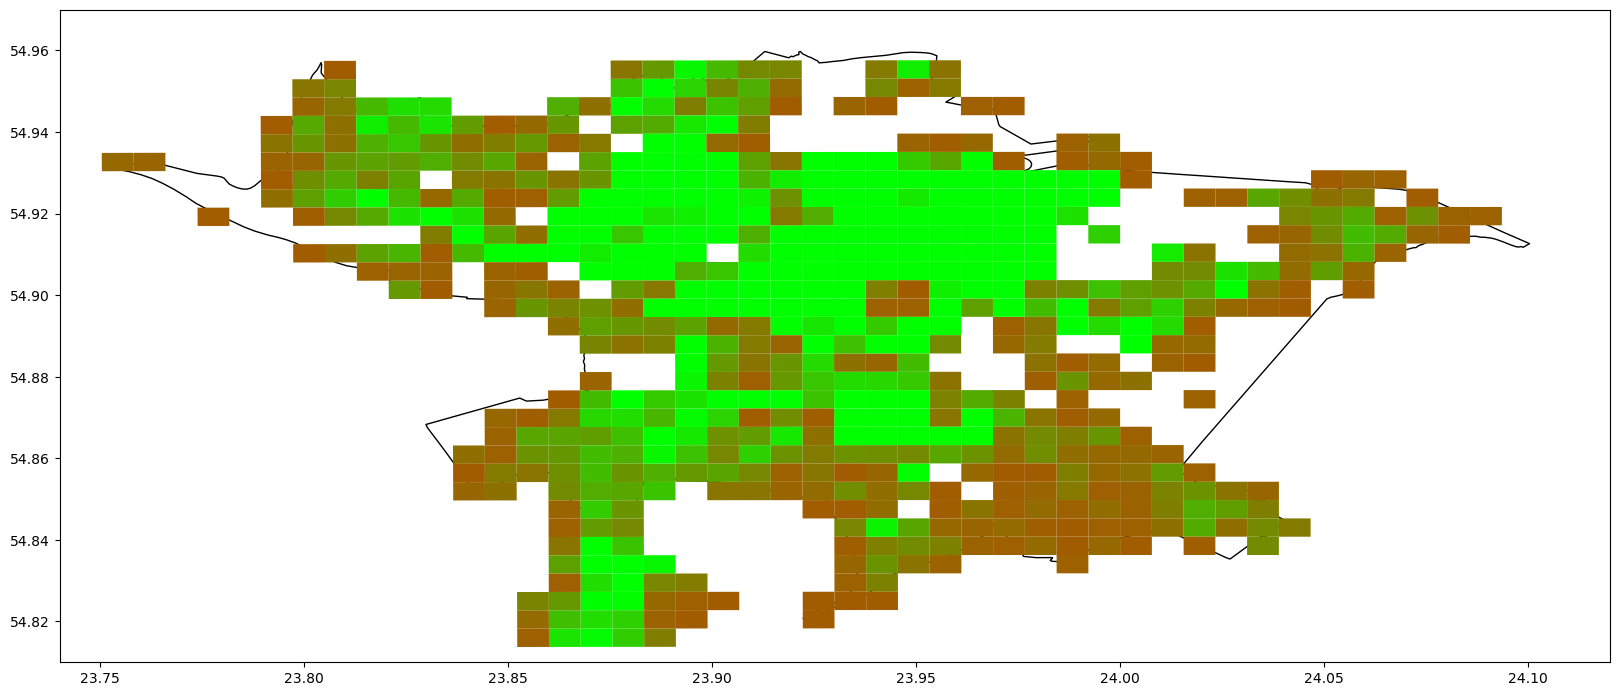

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1,1, figsize=(20, 10))

xlim_neg, xlim_pos = (23.74, 24.12)
ylim_neg, ylim_pos = (54.81, 54.97)
plt.xlim(xlim_neg, xlim_pos)
plt.ylim(ylim_neg, ylim_pos)

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

print(geo_data_merged.head())
geo_data_merged_gdf = gpd.GeoDataFrame(geo_data_merged, geometry='geometry_y')

# without this line the plot is well proportioned, but if I uncomment this line it becase less tall the large.
geo_data_merged_gdf.plot(facecolor=geo_data_merged_gdf.color, ax=ax, aspect='equal')
plt.show()
ax.set_aspect('equal')

In [7]:
def visualization(positionsFixed, positionsFree):
    # plotting 
    plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    
    plt.xlim(xlim_neg, xlim_pos)
    plt.ylim(ylim_neg, ylim_pos)
    
    exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")
    
    # plot fixed locations
    for location in positionsFixed:
        plt.plot(location[0], location[1], 'or')

    # plot free locations
    for location in positionsFree:
        plt.plot(location[0], location[1], 'ob')
    
    plt.show()
    ax.set_aspect('equal')

In [8]:
# load the current locations
filename =  "data.txt"
givenLocations = []
file1 = open(filename, 'r')
lines = file1.readlines()
n = 0
for line in lines:
    _locationType, y, x = line.split()
    givenLocations.append(Point(x, y))
    n+=1
# convert to common format
gdf_locations = gpd.GeoDataFrame({'geometry': givenLocations}, crs="EPSG:3346").to_crs(epsg=4326)

positionsFixed = np.zeros((n, 2))
for i, (_, row) in enumerate(gdf_locations.iterrows()):
    positionsFixed[i] = [row['geometry'].x, row['geometry'].y]

print(positionsFixed)

[[23.88669458 54.88982876]
 [23.90006946 54.88589078]
 [23.89569904 54.88394792]
 ...
 [23.94065285 54.90294076]
 [23.93575328 54.91074863]
 [23.9363238  54.91051263]]


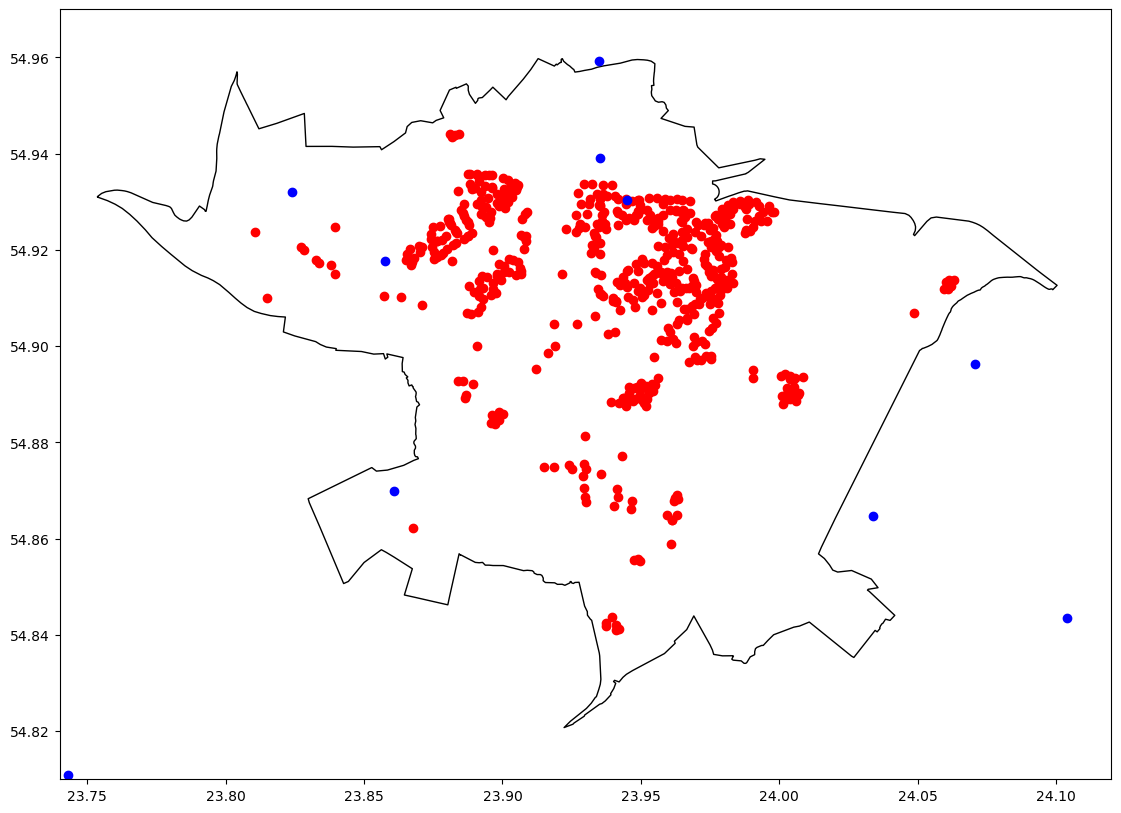

In [9]:
# generate and initialize random free positions, to be optimized with gradient descent
new = 10

x_values = np.random.uniform(xlim_neg, xlim_pos, new)
y_values = np.random.uniform(ylim_neg, ylim_pos, new)
positionsFree = np.column_stack((x_values, y_values))

originalPositionsFree = positionsFree.copy()

visualization(positionsFixed, positionsFree)

In [10]:
def distanceBetweenTwoPoints(point1, point2):
    return np.linalg.norm(point1-point2)

In [11]:
def averageDistanceBetweenAllPoints(positionsGivenNodes, positionsOptNodes):
    fullDistance, totalEdges = 0, 0
    # between 
    for i in range(0, len(positionsGivenNodes)):
        for j in range(0, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsGivenNodes[i], positionsOptNodes[j])
            totalEdges += 1

    for i in range(0, len(positionsOptNodes)):
        for j in range(i+1, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsOptNodes[i], positionsOptNodes[j])
            totalEdges += 1
    return fullDistance / totalEdges

In [12]:
def objectiveFunctDistanceImportance(positionsFixed, positionsFree, factor=16000):
    distanceVal = 0
    importanceVal = 0
    avgDist = averageDistanceBetweenAllPoints(positionsFixed, positionsFree)
    
    # distance value
    for i in range(0, len(positionsFixed)):
        for j in range(0, len(positionsFree)):
            edgeDistance = distanceBetweenTwoPoints(positionsFixed[i], positionsFree[j])
            distanceVal += (avgDist - edgeDistance)**2

    for i in range(0, len(positionsFixed)): # ToDo len(positionsFixed) or len(positionsFree)??
        for j in range(i+1, len(positionsFree)):
            edgeDistance =  distanceBetweenTwoPoints(positionsFree[i], positionsFree[j])
            distanceVal += (avgDist - edgeDistance)**2

    # point value
    for i in range(0, len(positionsFree)):
        importanceVal += float(get_normalized_value_at_coordinates(geo_data_merged, positionsFree[i, 0], positionsFree[i, 1]))
    
    return distanceVal + factor*1/(importanceVal + 1)

In [13]:
def quasiGradient(positionsGiven, positionsNew, objectiveFunction, h=0.00001):
    f0 = objectiveFunction(positionsGiven, positionsNew)
    df = positionsNew * 0;
    for i in range(0, len(positionsNew)):
        for j in range (0, 2): # x and y coordinates
            positionsFreeNew = positionsFree; 
            positionsFreeNew[i][j] += h
            f1 = objectiveFunction(positionsFixed, positionsFreeNew)
            df[i][j] = (f1-f0)/h;
    return df

In [14]:
def quasiGradientDescent(positionsFixed, positionsFree, objectiveFunction, step=0.1, eps=1e-6, maxIter=1000):
    iter = 0
    objValOld = objectiveFunction(positionsFixed, positionsFree)
    print("initial: ", objValOld)
    grad = quasiGradient(positionsFixed, positionsFree, objectiveFunction)
    while np.linalg.norm(grad) > eps and iter < maxIter and step > eps:
        grad = grad/np.linalg.norm(grad)
        positionsFree -= step * grad
        objValNew = objectiveFunction(positionsFixed, positionsFree) 
        if objValOld < objValNew:
            positionsFree += step * grad
            step = step * 0.9
        else:
            objValOld = objValNew
        grad = quasiGradient(positionsFixed, positionsFree, objectiveFunction)
        iter += 1
    print("iterations: ", iter,"/",maxIter)
    print("after optimization: ", objValNew)


In [15]:
quasiGradientDescent(positionsFixed, positionsFree, objectiveFunctDistanceImportance, maxIter=30)

initial:  2714.7682216246367
iterations:  30 / 30
after optimization:  5575.2167017096035


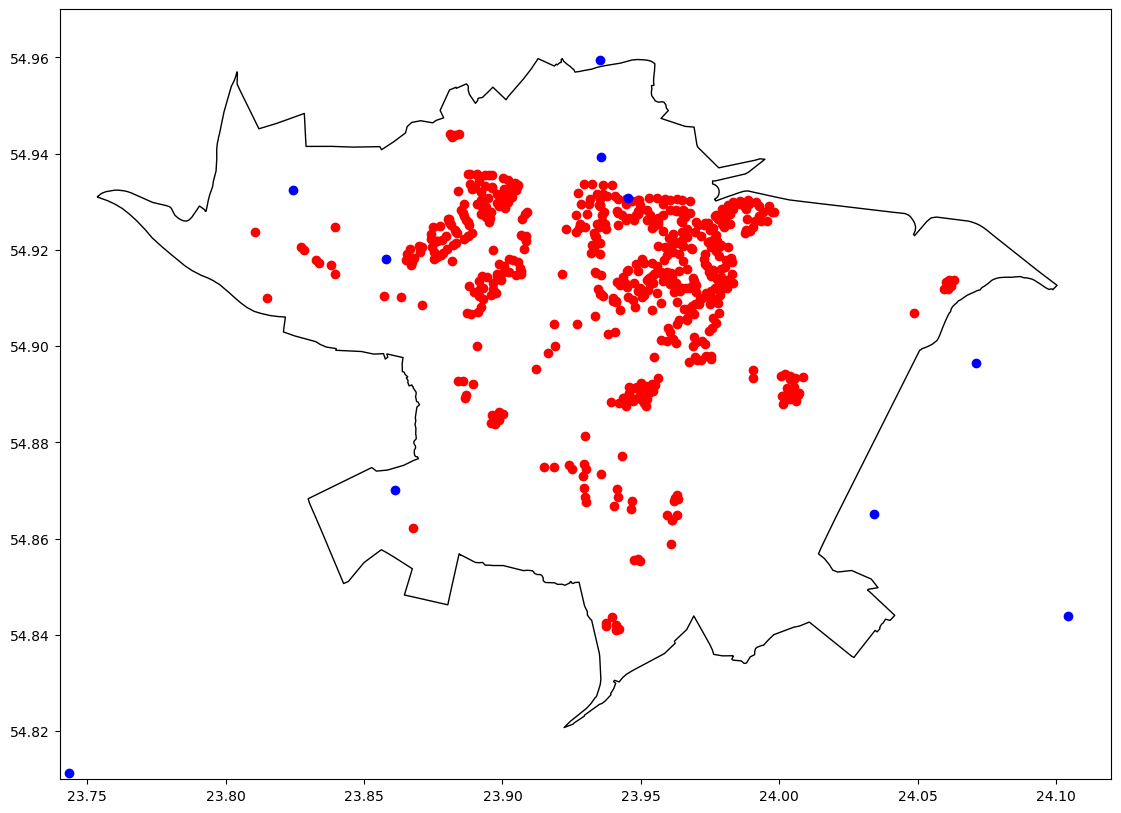

In [16]:
visualization(positionsFixed, positionsFree)

In [17]:
print("Optimized positions:")
for p in positionsFree:
    print(p)

# visualization(positionsFixed, positionsFree)

Optimized positions:
[23.93560847 54.93934702]
[24.03411272 54.86507074]
[24.07107252 54.89653222]
[23.74336784 54.81124981]
[23.85800965 54.9180144 ]
[24.10419942 54.84391388]
[23.93529435 54.95951921]
[23.86125808 54.87018916]
[23.94520598 54.93069703]
[23.82438688 54.93241224]


In [18]:
print("Original positions:")
for p in originalPositionsFree:
    print(p)

# visualization(positionsFixed, originalPositionsFree)

Original positions:
[23.93529847 54.93903702]
[24.03380272 54.86476074]
[24.07076252 54.89622222]
[23.74305784 54.81093981]
[23.85769965 54.9177044 ]
[24.10388942 54.84360388]
[23.93498435 54.95920921]
[23.86094808 54.86987916]
[23.94489598 54.93038703]
[23.82407688 54.93210224]
